In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Load Patient Data from CSV Files

In [3]:
df_Patient_IDS = pd.read_csv("../Assets/IDs_mapping.csv")
df_Patient_Data = pd.read_csv("../Assets/diabetic_data.csv")

## Phase 1: Data Ingestion & Clinical Sanitation

### 1 - Ingestion & Assessment

- Describing and identifying the two Data frames 
- Patient Id file includes three differnet data sets that require to extract them differently

In [4]:
df_Patient_IDS.head(10)

admission_type_id    description
0                         1      Emergency
1                         2         Urgent
2                         3       Elective
3                         4        Newborn
4                         5  Not Available
5                         6            NaN
6                         7  Trauma Center
7                         8     Not Mapped
8                       NaN            NaN
9  discharge_disposition_id    description

In [5]:
df_Patient_Data.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [6]:
df_Patient_IDS.describe()

admission_type_id description
count                 65          62
unique                32          58
top                    1  Not Mapped
freq                   3           2

In [7]:
df_Patient_Data.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [8]:
df_Patient_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [9]:
df_Patient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Finding IDs reading as integers instead of categories

In [10]:
for column in df_Patient_Data.columns:
    if (df_Patient_Data[column].dtypes == int and df_Patient_Data[column].nunique()):
        s = df_Patient_Data[column].nunique()
        print(column ," :",s)

encounter_id  : 101766
patient_nbr  : 71518
admission_type_id  : 8
discharge_disposition_id  : 26
admission_source_id  : 17
time_in_hospital  : 14
num_lab_procedures  : 118
num_procedures  : 7
num_medications  : 75
number_outpatient  : 39
number_emergency  : 33
number_inpatient  : 21
number_diagnoses  : 16


In the above cell "admission_type_id","discharge_disposition_id" and "admission_source_id" have int as the  data type but it contains a liitle amount of unique data 

In [11]:
df_Patient_Data["admission_type_id"].value_counts()

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

- Changing the column data types to category

In [12]:
categorical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
for col in categorical_cols:
    df_Patient_Data[col] = df_Patient_Data[col].astype('category')

In [13]:
df_Patient_Data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

- Get the 22 columns as Oral_med_cols and apply them as a one new column in the original dataframe

In [14]:
oral_med_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

df_Patient_Data['oracle_medecation'] = df_Patient_Data[oral_med_cols].apply(
    lambda row: 'Yes' if (row != 'No').any() else 'No',
    axis=1
)

- Drop the 22 columns as one column is created with the all details by them 

In [15]:
df_Patient_Data.drop(oral_med_cols, axis=1, inplace=True)

### 2. Standardizing Nulls

Finding columns that has "?" inside as it detects as a string by pandas, in casae it wont be detected as a null value

In [16]:
df_Patient_IDS.isin(["?"]).sum()

admission_type_id    0
description          0
dtype: int64

In [17]:
for columns in df_Patient_Data.columns:
    c = df_Patient_Data[columns].isin(["?"]).sum()
    if c > 0:
        print(columns , ":", c)

race : 2273
weight : 98569
payer_code : 40256
medical_specialty : 49949
diag_1 : 21
diag_2 : 358
diag_3 : 1423


Replacing the "?" with Nan and updating the original df

In [18]:
df_Patient_Data.replace('?',np.nan,inplace=True)

Get a precentage of null values 

In [19]:
for columns in df_Patient_Data.columns:
    precentage = df_Patient_Data[columns].isnull().mean()
    if precentage > 0:
        print(columns," :",round(precentage*100,2), "%")

race  : 2.23 %
weight  : 96.86 %
payer_code  : 39.56 %
medical_specialty  : 49.08 %
diag_1  : 0.02 %
diag_2  : 0.35 %
diag_3  : 1.4 %
max_glu_serum  : 94.75 %
A1Cresult  : 83.28 %


Drop columns weight and max_glu_serum as it contains more than 90% of null values

In [20]:
df_Patient_Data.drop('weight',axis=1,inplace=True)

In [21]:
for columns in df_Patient_Data.columns:
    precentage = df_Patient_Data[columns].isnull().mean()
    if precentage > 0:
        print(columns," :",round(precentage*100,2), "%")

race  : 2.23 %
payer_code  : 39.56 %
medical_specialty  : 49.08 %
diag_1  : 0.02 %
diag_2  : 0.35 %
diag_3  : 1.4 %
max_glu_serum  : 94.75 %
A1Cresult  : 83.28 %


- Split IDs_mapping.csv into 3 separate DataFrames

In [22]:
df_admissions = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=1,
    nrows=8,
    names=["admission_type_id", "description"]
)

In [23]:
df_admissions.dtypes

admission_type_id     int64
description          object
dtype: object

In [24]:
df_discharge = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=11,
    nrows=30,
    names=["discharge_disposition_id", "description"]
)

In [25]:
df_discharge.dtypes

discharge_disposition_id     int64
description                 object
dtype: object

In [26]:
df_source_map = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=44,
    nrows=26,
    names=["admission_source_id", "description"]
)

In [27]:
df_source_map.dtypes

admission_source_id     int64
description            object
dtype: object

- Combine dataframes with df_Patient_data

In [28]:
df_Patient_Data = df_Patient_Data.merge(
    df_admissions,
    on='admission_type_id',
    how='left'
).rename(columns={'description': 'admission_type_desc'})

df_Patient_Data = df_Patient_Data.merge(
    df_discharge,
    on='discharge_disposition_id',
    how='left'
).rename(columns={'description': 'discharge_disposition_desc'})

df_Patient_Data = df_Patient_Data.merge(
    df_source_map,
    on='admission_source_id',
    how='left'
).rename(columns={'description': 'admission_source_desc'})


In [29]:
df_Patient_Data

encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code  ... max_glu_serum  A1Cresult  insulin  \
0                      1        NaN  ...           NaN        NaN       No   
1                      3        NaN  ...           NaN        NaN       Up   
2                      2        NaN  ...           NaN        NaN       No   
3                      2        NaN  ...           NaN        NaN       Up   
4                      1        NaN  ...           NaN        NaN   Steady   
...                  ...        ...  ...           ...        ...      ...   
101761                 3         MC  ...           NaN         >8     Down   
101762                 5         MC  ...           NaN        NaN   Steady   
101763                 1         MC  ...           NaN        NaN     Down   
101764                10         MC  ...           NaN        NaN       Up   
101765                 6        NaN  ...           NaN        NaN       No   

        change  diabetesMed  readmitted  oracle_medecation  \
0           No           No          NO                 No   
1           Ch          Yes         >30                 No   
2           No          Yes          NO                Yes   
3           Ch          Yes          NO                 No   
4           Ch          Yes          NO                Yes   
...        ...          ...         ...                ...   
101761      Ch          Yes         >30                Yes   
101762      No          Yes          NO                 No   
101763      Ch          Yes          NO                Yes   
101764      Ch          Yes          NO                Yes   
101765      No           No          NO                 No   

       admission_type_desc                         discharge_disposition_desc  \
0                      NaN                                         Not Mapped   
1                Emergency                                 Discharged to home   
2                Emergency                                 Discharged to home   
3                Emergency                                 Discharged to home   
4                Emergency                                 Discharged to home   
...                    ...                                                

### 3. Handling Deceased Patients

In [30]:
expired_rows = df_Patient_Data['discharge_disposition_desc'].str.contains("Expired", case=False, na=False)
print(expired_rows.value_counts())


discharge_disposition_desc
False    100114
True       1652
Name: count, dtype: int64


In [31]:
df_Patient_Data['discharge_disposition_desc'].isin(expired_rows).value_counts()

discharge_disposition_desc
False    101766
Name: count, dtype: int64

In [32]:
df_Patient_Data.shape

(101766, 31)

In [33]:
df_Patient_Data = df_Patient_Data[~expired_rows]

In [34]:
df_Patient_Data.shape

(100114, 31)

### 4. Deduplication Strategy

In [35]:
df_Patient_Data.duplicated(subset=['encounter_id']).value_counts()


False    100114
Name: count, dtype: int64

## Phase 2: Data Enrichment via Web Scraping

- Ran a check to get a result for the number

In [36]:
import requests
from bs4 import BeautifulSoup

def get_icd9_description(code):
    url = "http://icd9.chrisendres.com/index.php"
    params = {"srchtype":"diseases","srchtext":{code},"Submit":"Search","action":"search"}
    response = requests.get(url,params=params)
    soup = BeautifulSoup(response.text, "html.parser")
    m = soup.find("div",class_="dlvl")

    if m :
        t = m.text.strip()
        return ' '.join(t.split(' ')[1:])



# Example usage
print(f"{get_icd9_description(428)}")

Heart failure


### 1. Target Identification

- Identified codes in the column 'diag_1'

In [37]:
Top_codes = df_Patient_Data['diag_1'].value_counts().head(20).index
Top_codes

Index(['428', '414', '786', '410', '486', '427', '491', '715', '682', '780',
       '434', '996', '276', '250.8', '599', '38', '584', 'V57', '250.6',
       '820'],
      dtype='object', name='diag_1')

### 2. Scraper Architecture:


- ICD-9 Code Description Extraction - In this step we collected medical descriptions for the most frequent ICD-9 diagnosis codes.

For each ICD-9 code in `Top_codes`, we:

1. Sent a search request to the ICD-9 lookup website.
2. Parsed the returned web page using BeautifulSoup.
3. Extracted the disease description related to the ICD-9 code.
4. Stored the code and its description in a dictionary called `icd9_description_map`.

If a description was not found for a code, it was marked as **"Description Not Found"**.

A short delay (`time.sleep(1)`) was added between requests to avoid overloading the website.

The final result is a mapping of ICD-9 codes to their medical descriptions that is used for better representation of diagnosis data.


In [38]:
import requests
from bs4 import BeautifulSoup
import time

icd9_description_map = {}

for code in Top_codes:
    url = "http://icd9.chrisendres.com/index.php"
    params = {
        "srchtype": "diseases",
        "srchtext": code,  
        "Submit": "Search",
        "action": "search"
    }

    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.text, "html.parser")

    m = soup.find("div", class_="dlvl")

    if m:
        text = m.text.strip()
        description = " ".join(text.split(" ")[1:])
    else:
        description = "Description Not Found"

    icd9_description_map[code] = description
    time.sleep(1) 

icd9_description_map


{'428': 'Heart failure',
 '414': 'Other forms of chronic ischemic heart disease',
 '786': 'Symptoms involving respiratory system and other chest symptoms',
 '410': 'Acute myocardial infarction',
 '486': 'Pneumonia, organism unspecified',
 '427': 'Cardiac dysrhythmias',
 '491': 'Chronic bronchitis',
 '715': 'Osteoarthrosis and allied disorders',
 '682': 'Other cellulitis and abscess',
 '780': 'General symptoms',
 '434': 'Occlusion of cerebral arteries',
 '996': 'Complications peculiar to certain specified procedures',
 '276': 'Disorders of fluid, electrolyte, and acid-base balance',
 '250.8': 'Diabetes with other specified manifestations',
 '599': 'Other disorders of urethra and urinary tract',
 '38': 'Description Not Found',
 '584': 'Acute renal failure',
 'V57': 'Care involving use of rehabilitation procedures',
 '250.6': 'Diabetes with neurological manifestations',
 '820': 'Fracture of neck of femur'}

### 3. Integration

In [39]:
df_Patient_Data['Primary_Diagnosis_Desc'] = df_Patient_Data['diag_1'].map(icd9_description_map).fillna("Other")

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\2680348495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Patient_Data['Primary_Diagnosis_Desc'] = df_Patient_Data['diag_1'].map(icd9_description_map).fillna("Other")


In [40]:
df_Patient_Data['Primary_Diagnosis_Desc'].value_counts()

Primary_Diagnosis_Desc
Other                                                             49276
Heart failure                                                      6735
Other forms of chronic ischemic heart disease                      6555
Symptoms involving respiratory system and other chest symptoms     4016
Acute myocardial infarction                                        3477
Pneumonia, organism unspecified                                    3413
Cardiac dysrhythmias                                               2729
Chronic bronchitis                                                 2252
Osteoarthrosis and allied disorders                                2147
Other cellulitis and abscess                                       2030
General symptoms                                                   2012
Occlusion of cerebral arteries                                     1958
Complications peculiar to certain specified procedures             1944
Disorders of fluid, electrolyte, and acid

## Phase 3: Exploratory Data Analysis (EDA)

### 1. The Readmission Landscape:

In [41]:
df_Patient_Data['readmitted'].value_counts(normalize=True)*100

readmitted
NO     53.151407
>30    35.504525
<30    11.344068
Name: proportion, dtype: float64

In [42]:
fig = px.histogram(
    df_Patient_Data,
    x="readmitted",
    title="Readmission Status Distribution",
    labels={
        "readmitted": "Readmitted",
        "count": "Number of Patients"
    },
    text_auto=True
)

fig.update_layout(
    width=700,
    height=500,
    template="plotly_white",
    bargap=0.2,
    title_x=0.5
)

fig.update_xaxes(title_text="Readmitted",fixedrange=True)
fig.update_yaxes(title_text="Number of Patients",fixedrange=True)

fig.show()


The Histogram shows that the most number of patients have not readmitted. The number of patients readmitted within 30 days are minority but its a HRRP penalty group. Although it is smaller in size, but this group is the most important for analysis and interventions because it directly affects hospital performance and patient outcomes.

In [43]:
df_Patient_Data['race'].value_counts()

race
Caucasian          74845
AfricanAmerican    18888
Hispanic            2024
Other               1486
Asian                632
Name: count, dtype: int64

### 2. Demographic Profiling:

Visualizing the distribution of age.

In [44]:
df_Patient_Data['age'].value_counts(normalize=True)*100

age
[70-80)     25.532893
[60-70)     22.159738
[50-60)     17.082526
[80-90)     16.686977
[40-50)      9.615039
[30-40)      3.760713
[90-100)     2.664962
[20-30)      1.648121
[10-20)      0.689214
[0-10)       0.159818
Name: proportion, dtype: float64

In [45]:

fig = px.histogram(
    df_Patient_Data,
    x="age",
    title="Age Distribution of Patients",
    text_auto=True
)

fig.update_layout(
    width=950,
    height=500,
    bargap=0.2,
    template="plotly_white",
    title_x=0.5,
    xaxis_tickangle=-45
)

fig.update_xaxes(title_text="Age Group",fixedrange=True)
fig.update_yaxes(title_text="Number of Patients",fixedrange=True)

fig.show()


This bar graph depicts that most eldery persons who is old more than 60 yesrs affect diabetes more than the young generations.
In a nutshell the majority of the diabetic patients are those above 60 years.

- Analyze readmission rates stratified by race and gender.

In [46]:
df_Patient_Data['gender'].value_counts(normalize=True)*100

gender
Female             53.799668
Male               46.197335
Unknown/Invalid     0.002997
Name: proportion, dtype: float64

In [47]:
df_Patient_Data['race'].value_counts(normalize=True)*100

race
Caucasian          76.469987
AfricanAmerican    19.298084
Hispanic            2.067944
Other               1.518263
Asian               0.645722
Name: proportion, dtype: float64

In here , we cleaned the dataset by removing records with invalid or unknown demographic information.

- Excluded rows where the gender value is "Unknown/Invalid".
- Excluded rows where the race value is "?".

In [48]:
df_clean = df_Patient_Data[
    (df_Patient_Data["gender"] != "Unknown/Invalid") &
    (df_Patient_Data["race"] != "?")
]

In here, we created a new column called readmit_30. We converted the original readmitted values into a simple numeric format,If a patient was readmitted within 30 days ("<30"), we assigned 1 Otherwise 0

Why we did this:

This binary (0/1) format makes it easier to analyze readmissions and use the data in charts. It clearly shows whether a patient was readmitted within 30 days or not.

In [49]:
df_clean["readmit_30"] = df_clean["readmitted"].apply(
    lambda x: 1 if x == "<30" else 0
)


C:\Users\liyan\AppData\Local\Temp\ipykernel_944\2102241682.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We calculated the average 30-day readmission rate for different race and gender group. This helps us compare how 30-day readmission rates different across race and gender, making it easier to identify patterns.

In [50]:
rate_df = (
    df_clean
    .groupby(["race", "gender"])["readmit_30"]
    .mean()
    .reset_index()
)



We used ploty express for interactive data visualizations instead of static data visualizations Also in here fixedrange=True,      
disabled zooming to keep the chart layout fixed

In [51]:
fig = px.bar(
    rate_df,
    x="race",
    y="readmit_30",
    color="gender",
    barmode="group",
    title="Readmission Rate by Race and Gender",
    labels={"readmit_30": "30-Day Readmission Rate"}
)

fig.update_xaxes(
    fixedrange=True            
)

fig.update_yaxes(
    tickformat=".0%",
    fixedrange=True
)

fig.show()


The Bar chart shows that, the chance of being readmitted within 30 days is not the same for all groups. Some differences appear between males and females within the same race, and also between different races within the same gender.

### 3. Medication Efficacy Analysis:

Comparison of the readmission rates of patients on Insulin , oral medications & no medication.

In [52]:
df_Patient_Data['insulin'].value_counts()

insulin
No        46680
Steady    30331
Down      12012
Up        11091
Name: count, dtype: int64

In [53]:
df_Patient_Data['oracle_medecation'].value_counts()

oracle_medecation
No     53044
Yes    47070
Name: count, dtype: int64

Here we created `medication_type` to group patients based on the type of treatment they had. If a patient was given insulin, they were labeled as “Insulin”. If they were not on insulin but were taking oral medication, they were labeled as “Oral”. Patients who did not receive either were labeled as “No Medication”. This makes the medication data easier to understand and analyze in later stages of the project.


In [54]:
def med_type(row):
    if row['insulin'] != 'No':
        return 'Insulin'
    elif row['oracle_medecation'] == 'Yes':
        return 'Oral'
    else:
        return 'No Medication'

df_Patient_Data['medication_type'] = df_Patient_Data.apply(med_type, axis=1)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\3854621042.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



we applied the same logic using a lambda function to get patinets who are admitted within a short period and created a new column for easy visualizations

In [55]:
df_Patient_Data["readmit_30"] = df_Patient_Data["readmitted"].apply(
    lambda x: 1 if x == "<30" else 0
)


C:\Users\liyan\AppData\Local\Temp\ipykernel_944\1931100333.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Here we grouped two columns of 'medication_type' and 'readmit_30' 

In [56]:
med_rate = (
    df_Patient_Data
    .groupby("medication_type")["readmit_30"]
    .mean()
    .reset_index()
)


In [57]:
fig = px.bar(
    med_rate,
    x="medication_type",
    y="readmit_30",
    title="30-Day Readmission Rate by Medication Type",
    labels={"readmit_30": "30-Day Readmission Rate"}
)

fig.update_layout(
    width=750,               
    height=500,
    template="plotly_white",
    bargroupgap=0.1,         
    title_x=0.5
)
fig.update_xaxes(
    fixedrange=True            
)

fig.update_yaxes(
    fixedrange=True,
    tickformat=".0%"
)

fig.show()


- Patients were divided into three groups: Insulin, oral medication, and no medication. We created a 30-day readmission indicator, giving a value of 1 to patients who were readmitted within 30 days and 0 to everyone else. Then we calculated the percentage of patients readmitted within 30 days for each medication group so that the comparison is fair.

- The results show that patients taking Insulin have a higher chance of being readmitted within 30 days compared to those on oral medications or no medication.

- These findings suggest that patients on Insulin may need closer follow-up and extra care after discharge to help prevent early readmissions.

#### Patient’s medication changed during the hospital visit

In [58]:
df_Patient_Data['change'].value_counts()

change
No    53671
Ch    46443
Name: count, dtype: int64

In [59]:
change_rate = (
    df_Patient_Data
    .groupby("change")["readmit_30"]
    .mean()
    .reset_index()
)

In [60]:
fig = px.bar(
    change_rate,
    x="change",
    y="readmit_30",
    title="30-Day Readmission Rate by Medication Change",
    labels={"readmit_30": "30-Day Readmission Rate"}
)

fig.update_layout(
    width=750,               
    height=500,
    template="plotly_white",
    bargroupgap=0.1,         
    title_x=0.5
)

fig.update_xaxes(
    fixedrange=True            
)

fig.update_yaxes(
    fixedrange=True,
    tickformat=".0%"
)

fig.show()


This Barchart shows that the medication changes for patients who admitted within 30 days has more readmission rate when compared to the people who admiitted within 30 days but had no medication change. In other words, a medication change can be a warning sign that the patient may need closer monitoring, follow-up, or additional support after discharge to prevent early readmission.

### 4. Operational Metrics:

1) Visualizing the relationship between time_in_hospital and num_lab_procedures.

In [61]:
df_Patient_Data['time_in_hospital'].value_counts()

time_in_hospital
3     17546
2     16976
1     13878
4     13775
5      9834
6      7425
7      5744
8      4323
9      2927
10     2290
11     1809
12     1401
13     1173
14     1013
Name: count, dtype: int64

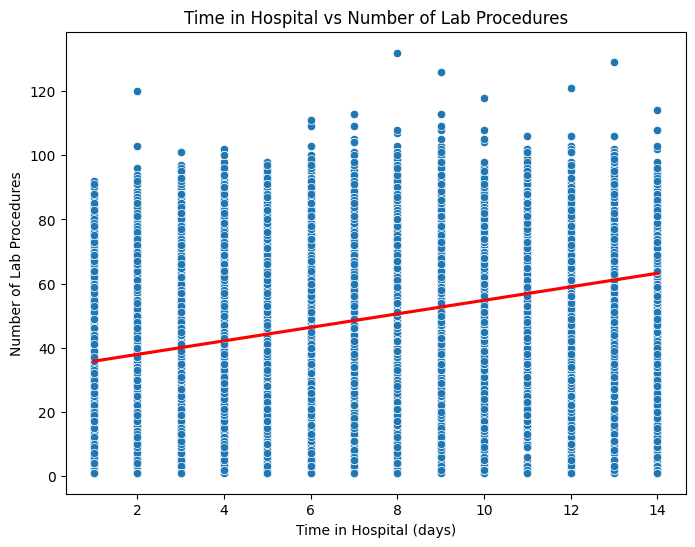

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_Patient_Data,
    x="time_in_hospital",
    y="num_lab_procedures"
)

sns.regplot(
    data=df_Patient_Data,
    x="time_in_hospital",
    y="num_lab_procedures",
    scatter=False,  # only plot line
    color="red"
)

plt.title("Time in Hospital vs Number of Lab Procedures")
plt.xlabel("Time in Hospital (days)")
plt.ylabel("Number of Lab Procedures")
plt.show()


- We analyzed the relationship between the length time in hospital and the number of lab procedures performed. A scatter plot with a a regression line was created to visualize the trend.

- The plot shows that the patients who stayed longer in the hospital, had more lab procedures performed. This indicates a positive correlation between hospital stay and the number of lab tests. This suggests that sicker patients get requires more investigations during their stay.


2) Correlation heatmap of numerical features

In [63]:
import plotly.express as px

num_cols = ['num_medications', 'num_lab_procedures', 'time_in_hospital']

corr_matrix = df_Patient_Data[num_cols].corr()
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap of Numerical Features"
)

fig.update_layout(
    width=600,
    height=500,
    title_x=0.5
)

fig.show()


- We created a heatmap to see how the numerical features (number of medications, number of lab tests, and time in hospital) are related.
    - Positive correlation → when one goes up, the other also tends to go up.

    - Negative correlation → when one goes up, the other goes down.

- This helps identify multicollinearity, meaning some features are closely related.
    - For example, patients who take more medications often have more lab tests, showing they may be more complex or sicke

Box plot of time in hospital grouped by readmitted status

In [64]:
df_subset = df_Patient_Data[df_Patient_Data['readmitted'].isin(['NO', '<30'])]

fig = px.box(
    df_subset,
    x='readmitted',
    y='time_in_hospital',
    color='readmitted',
    title="Time in Hospital by Readmission Status",
    labels={'readmitted': 'Readmitted', 'time_in_hospital': 'Time in Hospital (days)'}
)

fig.update_layout(width=700, height=450, title_x=0.5)
fig.show()


- The box plot shows the comparison of the time in hospital between patients who were readmitted within 30 days and those who were not.The plot shows that patients readmitted within 30 days generally had longer hospital stays compared to patients not readmitted. 

- Additionally, there are several outliers in the <30 group, representing patients who stayed much longer than typical. These extreme cases may indicate more severe or complex health conditions, which could contribute to early readmission.

In [65]:
df_subset2 = df_Patient_Data[df_Patient_Data['discharge_disposition_desc'].isin([
    'Discharged to home', 
    'Discharged/transferred to a Skilled Nursing Facility (SNF)'
])]


In [66]:
readmit_counts = df_subset2.groupby(['discharge_disposition_desc', 'readmitted']).size().unstack(fill_value=0)
print(readmit_counts)

readmitted                                           <30    >30     NO
discharge_disposition_desc                                            
Discharged to home                                  5602  21517  33115
Discharged/transferred to a Skilled Nursing Fac...  2046   4916   6992


In [67]:
readmit_rates = readmit_counts.div(readmit_counts.sum(axis=1), axis=0) * 100
print(readmit_rates)


readmitted                                                <30        >30  \
discharge_disposition_desc                                                 
Discharged to home                                   9.300395  35.722350   
Discharged/transferred to a Skilled Nursing Fac...  14.662462  35.230042   

readmitted                                                 NO  
discharge_disposition_desc                                     
Discharged to home                                  54.977255  
Discharged/transferred to a Skilled Nursing Fac...  50.107496  


In [68]:
df_subset2['discharge_disposition_desc'] = df_subset2['discharge_disposition_desc'].replace(
    'Discharged/transferred to a Skilled Nursing Facility (SNF)',
    'Transferred to Nursing Room'
)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\3592271664.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
readmit_rates_30 = df_subset2.groupby('discharge_disposition_desc')['readmit_30'].mean().reset_index()


In [70]:
fig = px.bar(
    readmit_rates_30,
    x='discharge_disposition_desc',
    y='readmit_30',
    text_auto=True,
    title='30-Day Readmission Rate by Discharge Disposition',
    labels={'discharge_disposition_desc': 'Discharge Disposition', 'readmit_30': '30-Day Readmission Rate'},
    color_discrete_sequence=[["#1fb48f","#2CB104"]]
)

fig.update_yaxes(tickformat=".0%")
fig.update_layout(width=700, height=450, title_x=0.5)
fig.show()


- We analyzed 30-day readmission rates based on discharge disposition. The bar chart shows that patients discharged to a Skilled Nursing Facility (SNF) have higher early readmission rates compared to those discharged home.

- This indicates that patients sent to SNFs are generally sicker or less stable, and may require closer monitoring and follow-up after discharge to reduce early readmissions.


### Phase 4: Feature Engineering - The "Vitality Complexity Index"

1. L - Length of Stay Score:

In [71]:
df_Patient_Data['time_in_hospital'].value_counts().sort_index()

time_in_hospital
1     13878
2     16976
3     17546
4     13775
5      9834
6      7425
7      5744
8      4323
9      2927
10     2290
11     1809
12     1401
13     1173
14     1013
Name: count, dtype: int64

We converted the number of days a patient stayed in the hospital into a simplified **length-of-stay score**. Based on the value in `time_in_hospital`, patients were assigned a score where shorter stays received lower scores and longer stays received higher scores. 


In [72]:
def score_of_stay(day):
    if day<1:
        return 0
    elif 1 <= day <= 4:
        return 1
    elif 5 <= day <= 13:
        return 4
    else:
        return 7
    

In [73]:
df_Patient_Data['L_score'] = df_Patient_Data['time_in_hospital'].apply(score_of_stay)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\3060883962.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df_Patient_Data['L_score'].value_counts().sort_index()

L_score
1    62175
4    36926
7     1013
Name: count, dtype: int64

2. A - Acuity of Admission Score:

In [75]:
df_Patient_Data['admission_type_desc'].value_counts().sort_index()

admission_type_desc
Elective         18739
Emergency        52884
Newborn             10
Not Available     4690
Not Mapped         320
Trauma Center       18
Urgent           18226
Name: count, dtype: int64

We created a new column called `A_score` based on the patient’s admission type. If the `admission_type_id` was 1 or 7 the patient was given 3, and all other admission types were given 0. 

In [76]:
def check(id):
    if id == 1 or id == 7:
        return 3
    else:
        return 0
    
df_Patient_Data['A_score'] =df_Patient_Data['admission_type_id'].apply(check)


C:\Users\liyan\AppData\Local\Temp\ipykernel_944\800975331.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df_Patient_Data['A_score'].value_counts()

A_score
3    52902
0    47212
Name: count, dtype: int64

3. C - Comorbidity Burden Score (Proxy):

In [78]:
df_Patient_Data['number_diagnoses'].value_counts()

number_diagnoses
9     48363
5     11323
8     10430
7     10271
6     10043
4      5509
3      2824
2      1021
1       219
16       42
10       17
13       16
11       11
15       10
12        8
14        7
Name: count, dtype: int64

Here we created `C_score` to represent the number of diagnoses a patient had. Patients with fewer than 4 diagnoses received 0, those with 4 to 7 diagnoses received 3 and patients with more than 7 diagnoses received 5.

In [79]:
def count(n):
    if n < 4:
        return 0
    elif n >= 4 and n<=7:
        return 3
    else:
        return 5
    
df_Patient_Data['C_score']  = df_Patient_Data['number_diagnoses'].apply(count)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\1696730523.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
df_Patient_Data['C_score'].value_counts()

C_score
5    58904
3    37146
0     4064
Name: count, dtype: int64

4. E - Emergency Visit Intensity Score:

In [81]:
df_Patient_Data['number_emergency'].value_counts().sort_index()

number_emergency
0     88925
1      7538
2      2005
3       713
4       371
5       190
6        93
7        73
8        50
9        33
10       34
11       23
12       10
13       12
14        3
15        3
16        5
18        5
19        4
20        4
21        2
22        6
24        1
25        2
28        1
29        1
37        1
42        1
46        1
54        1
63        1
64        1
76        1
Name: count, dtype: int64

In here `E_score` shows the number of emergency visits patients had. Patients with no visits received 0 those with 1 to 4 visits received 3, and those with more than 4 visits received 5.

In [82]:
def visitCount(x):
    if x == 0:
        return 0 
    elif 1 <= x <= 4:
        return 3
    elif x > 4:
        return 5
    else:
        return "Wrong input"
    

df_Patient_Data['E_score'] = df_Patient_Data['number_emergency'].apply(visitCount)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\4101275208.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df_Patient_Data['E_score'].value_counts()

E_score
0    88925
3    10627
5      562
Name: count, dtype: int64

- Calculation: VCI_Score = L + A + C + E

In this step, we created a new column called `VCI_Score` by adding together the scores from length of stay (`L_score`), admission type (`A_score`), number of diagnoses (`C_score`), and emergency visits (`E_score`). This combined score gives a single measure of a patient’s overall clinical risk or complexity, making it easier to compare patients and analyze outcomes in one number.


In [84]:
df_Patient_Data['VCI_Score'] = (
    df_Patient_Data['L_score'] +
    df_Patient_Data['A_score'] +
    df_Patient_Data['C_score'] +
    df_Patient_Data['E_score']
)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\3463509032.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df_Patient_Data['VCI_Score'].value_counts().sort_index()

VCI_Score
1      1754
4     14559
6     11788
7     18338
9     27746
10     5939
11      108
12    16836
13      426
14      189
15     2308
16       11
17       81
18       30
20        1
Name: count, dtype: int64

Categorize patients into three strata:

Patients with a score below 7 were labeled as "Low Risk" and scores from 7 to 10 as "Medium Risk", and scores above 10 as "High Risk". This makes it easier to quickly understand a patient’s risk level and use it for analysis or decision-making.

In [86]:
def risk_category(vci):
    if vci < 7:
        return 'Low Risk'
    elif 7 <= vci <= 10:
        return 'Medium Risk'
    else:
        return 'High Risk'

df_Patient_Data['VCI_Risk'] = df_Patient_Data['VCI_Score'].apply(risk_category)

C:\Users\liyan\AppData\Local\Temp\ipykernel_944\802951782.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
df_Patient_Data['VCI_Risk'].value_counts()

VCI_Risk
Medium Risk    52023
Low Risk       28101
High Risk      19990
Name: count, dtype: int64

In [88]:
df_Patient_Data['readmitted'].value_counts()

readmitted
NO     53212
>30    35545
<30    11357
Name: count, dtype: int64

 - Using Lambda function get patients data of admitted within a month

In [89]:
df_Patient_Data['readmitted_30'] = df_Patient_Data['readmitted'].apply(
    lambda x: 1 if x == '<30' else 0
)


C:\Users\liyan\AppData\Local\Temp\ipykernel_944\1315536915.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
readmission_by_risk = (
    df_Patient_Data
    .groupby('VCI_Risk')['readmitted_30']
    .mean()
    .reset_index()
)

readmission_by_risk


VCI_Risk  readmitted_30
0    High Risk       0.147274
1     Low Risk       0.088075
2  Medium Risk       0.114142

In [91]:
readmission_by_risk['Readmission_Percentage'] = (
    readmission_by_risk['readmitted_30'] * 100
)



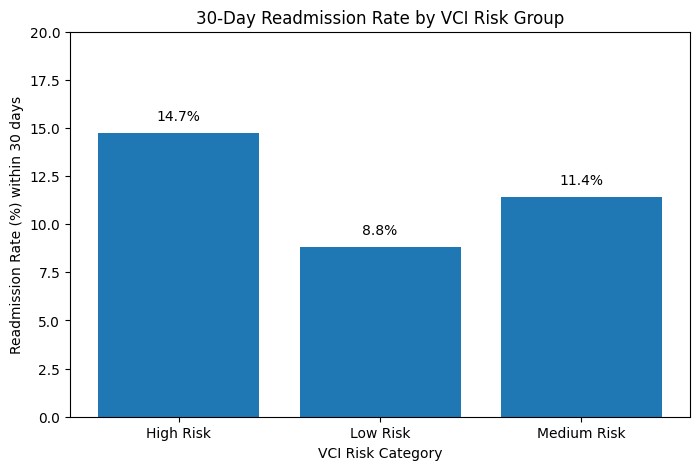

In [92]:
plt.figure(figsize=(8,5))

bars = plt.bar(
    readmission_by_risk['VCI_Risk'],
    readmission_by_risk['Readmission_Percentage']
)

plt.ylabel('Readmission Rate (%) within 30 days')
plt.xlabel('VCI Risk Category')
plt.title('30-Day Readmission Rate by VCI Risk Group')
plt.ylim(0, 20)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()


The Vitality Complexity Index (VCI) combines four factors to assess patient risk:
1. **Length of Stay** – longer stays indicate higher risk.
2. **Acuity of Admission** – emergency or trauma admissions are riskier.
3. **Comorbidity Burden** – patients with more diagnoses have higher risk.
4. **Emergency Visit History** – more prior ER visits increase risk.

The scores are summed to create a VCI score, and patients are categorized as 
Low, Medium, or High Risk. 

Analysis shows that patients in the High-Risk category have the highest 30-day 
readmission rates, validating the usefulness of the VCI for identifying patients 
who may need extra post-discharge support.


In [93]:
df_Patient_Data.to_pickle("../Assets/Patient_data.pkl")